<a href="https://colab.research.google.com/github/VimalChamyal/Advertisement/blob/main/Predicting_sales_using_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importing most important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset from my github

url = 'https://github.com/VimalChamyal/Advertisement/raw/main/advertising.csv'

In [6]:
# Loading the dataset

df = pd.read_csv(url)

# Checking out 1st 5 records in our dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Here 'Sales' is the dependent column/ target variable. We will be creating a model that will help us predict sales based on the mediums used for advertisement (These are also our independent columns / features)

In [9]:
df.shape

(200, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Graphical EDA**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


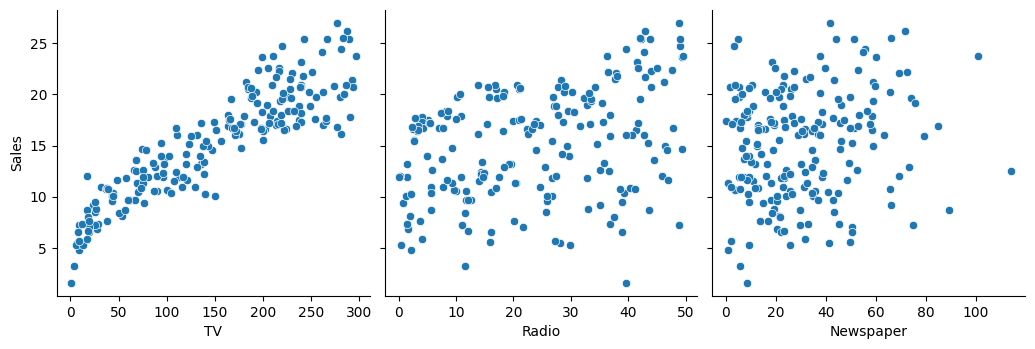

In [17]:
sns.pairplot(
    df,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars=['Sales'], kind='scatter', size = 3.5
)

# Pairplot is used to plot pairwise relationships in a dataset.

Radio vs Sales & Newspaper vs Sales isn't making any pattern. Whereas the relationship of TV vs Sales is linear.

We will try to use **Simple Linear Regression** to create a model which will help us predict sales using TV column

In [18]:
X = df['TV']
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [20]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(140,)
(60,)
(140,)
(60,)


In [22]:
X_train.head()

# The values in the 2nd column are our features/ values for our independent variable (T.V)

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [24]:
y_train.head()

# The values in the 2nd column are our target values which we need to predict (Sales)

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

In [26]:
# I'll be using statsmodel to build the SLR model

import statsmodels.api as sm

The statsmodels library by default fits a line on the dataset passing through the origin. In order to have an intercept, we need to use the add_constant attribute. Once added to the X_train dataset, we can fit a regression line using the OLS (Ordinary Least Squares) attribute.

In [27]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [28]:
# We will checkout the parameters, i.e. the intercept and the slope

lr.params

const    7.206555
TV       0.054835
dtype: float64

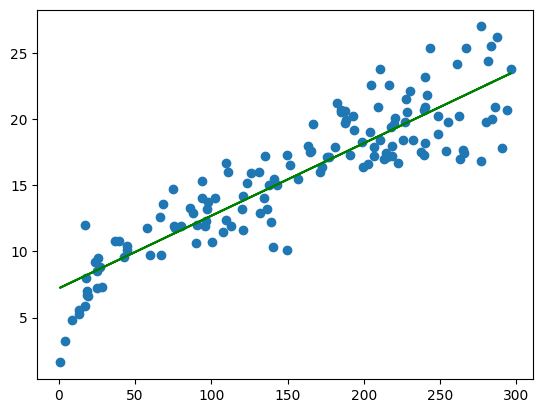

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.206555 + 0.054835*X_train, 'g')
plt.show()

# When I was writing this code 1st time, I got the intercept value (const) as 7.206555 and slope value (TV) as 0.054835.
# Hence I have used those values to plot the regression line

**MAKING PREDICTIONS ON THE TEST DATASET**

Again we need to add a constant to the X_test data like we did for X_train and then will predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [38]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [39]:
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [40]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#RMSE: Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.27585706980176

In [41]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.814855389208679

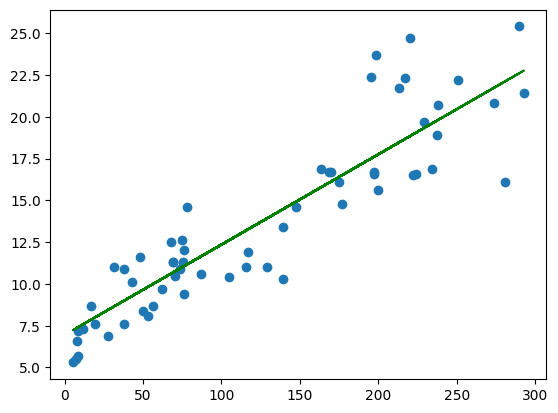

In [43]:
#Visualizing the fit on the test set

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'g')
plt.show()